In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from RBM import *
from principal_DNN_mnist import *
from pathlib import Path

In [2]:
data_path = Path(".") / "data"/ "binaryalphadigs.mat"

In [3]:
data_mat = scio.loadmat(data_path)
data = data_mat['dat']
label = data_mat['classlabels'][0]
label_ = {i:label[i][0] for i in range(len(label))}
print("Label with their indices:")
print(label_)

Label with their indices:
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


<b> Visualize training data </b>

In [4]:
# Visual a list of images
def visual_images(list_images):
    nb_imgs = len(list_images)
    # 5 images each column
    nb_columns = 5 if nb_imgs >= 5 else nb_imgs
    nb_rows = nb_imgs//5 + 1 if nb_imgs%5 != 0 else nb_imgs//5
    fig, axs = plt.subplots(nb_rows, nb_columns, figsize=(2*nb_columns, 2*nb_rows))
    for image, ax in zip(list_images, axs.flatten()):
        ax.imshow(image, cmap='gray')
        ax.axis('off')

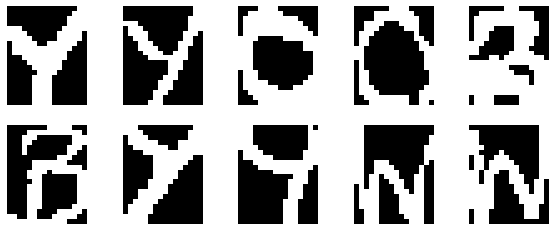

In [5]:
# Random pick some images in data set and visualize
imgs = [data[i][j] for i in np.random.randint(0,35,5) for j in np.random.randint(0,39, 2)]
visual_images(imgs)

### RBM
Using RBM on Binary Alphadigit to generate approximate images

In [6]:
#parameters

# value of images to process
index = [3, 5]
lr = 0.1
batch_size = 3
iterations = 500

In [7]:
#get data of index values
X = lire_alpha_digit(data, index)

Training Started. 10 iterations.


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.92it/s]


End Training
--------------
Image generated with RBM of 10 trained epochs
Generated 5 images


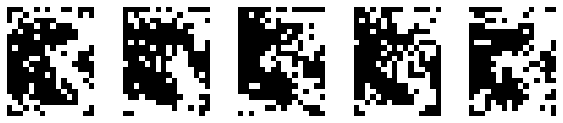

In [8]:
# Initializing RBM
rbm = RBM(320, 200)
# Training RBM on data
rbm.fit(X, 10, lr, batch_size)
print("Image generated with RBM of 10 trained epochs")
generated_images = rbm.generate_image(5, 500)
visual_images(generated_images)

Training Started. 1000 iterations.


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.03it/s]


End Training
--------------
Image generated with RBM of 1000 trained epochs
Generated 5 images


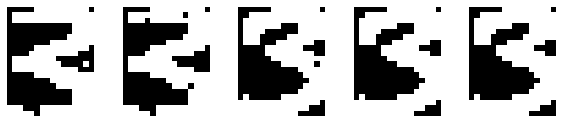

In [9]:
# Initializing RBM
rbm = RBM(320, 200)
# Training RBM on data
rbm.fit(X, 1000, lr, batch_size)
print("Image generated with RBM of 1000 trained epochs")
generated_images = rbm.generate_image(5, 500)
visual_images(generated_images)

<div class="alert alert-success">
We can observe that RBM can generate images which are very similar to original images. Otherwise, this structure can learn distribution combined from distributions of several values. As in our example, it can learn at the same time the distribution of pixels in images of value 3 and 5. Then it can generate arbitrarily the image of number 3 or 5.
</div>

### DBN
We construct the DBN structure as a chain of RBM with predefined number of nodes in hidden layers.

In [2]:
class DNN():
    
    def __init__(self, p, q, hidden_dims):
        self.DNN = []
        hidden_dims_ = hidden_dims
        hidden_dims_.append(q)
        self.nb_layers = len(hidden_dims_)
        self.dim_input = p
        self.dim_output = q

        # Construct DNN as chain of DBMs
        temp_dim_input = p
        for temp_dim_output in hidden_dims_:
            self.DNN.append(RBM(temp_dim_input, temp_dim_output))
            temp_dim_input = temp_dim_output
    
    def pretrain_DNN(self, X, nb_epoch, lr, batch_size):
        X_train = X
        for i in range(self.nb_layers):
            print(f"Training layer {i}")
            self.DNN[i].fit(X_train, nb_epoch, lr, batch_size)
            X_train = self.DNN[i].entree_sortie_RBM(X_train)
            #print("\n")
    
    def gibbs(self, input, iterations):
        for n in range(iterations):
            init_ = input
            for i in range(self.nb_layers):
                init_ = self.DNN[i].entree_sortie_RBM(init_)
            out_ = init_
            for i in range(self.nb_layers):
                idx_layer = self.nb_layers-i-1
                out_ = self.DNN[idx_layer].sortie_entree_RBM(out_)
        return out_
    
    def generer_image_DBN(self, nb_image, iterations):
        output = []
        for i in range(nb_image):
            input_init = np.random.rand(1, self.dim_input)
            generated_image = self.gibbs(input_init, iterations)
            generated_image =  np.reshape(generated_image, (20, 16))
            generated_image = np.round(generated_image)
            output.append(generated_image)
        print(f"Generated {nb_image} images.")
        return output

In [3]:
# parameters
X = lire_alpha_digit(data, [10, 28, 30])
hidden_nodes = [100, 200, 200, 100]
epochs = 100
lr = 0.1
batch_size = 3

NameError: name 'data' is not defined

In [30]:
# Get DBN structure
DBN = DNN(320, 100, hidden_nodes)
DBN.pretrain_DNN(X, epochs, lr, batch_size)

Training layer 0
Training Started. 100 iterations.


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.09it/s]


End Training
--------------
Training layer 1
Training Started. 100 iterations.


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.67it/s]


End Training
--------------
Training layer 2
Training Started. 100 iterations.


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.99it/s]


End Training
--------------
Training layer 3
Training Started. 100 iterations.


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.35it/s]


End Training
--------------
Training layer 4
Training Started. 100 iterations.


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 70.48it/s]

End Training
--------------


Generated 10 images.
10


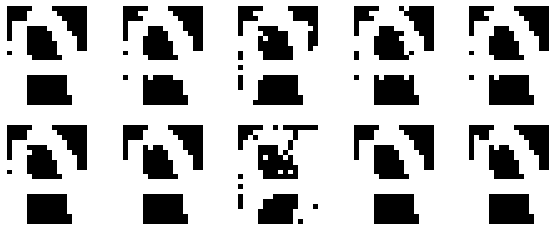

In [33]:
generated_images = DBN.generer_image_DBN(10 , 500)
print(len(generated_images))
visual_images(generated_images)

<div class ="alert alert-success">
We can observe that DBN works well with smaller number of training epochs in comparing to RBM. RBM needs more epochs to get the same quality as DBN. It is evident because DBN is a combination of several RBM and is more complexe than RBM.
</div>

### DNN

In [45]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Variable binaire
train_X = train_X > 127
test_X  = test_X > 127

# Reshape pour respect le format attendu par le modéle
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]*train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1]*test_X.shape[2])


tmp = np.zeros((test_y.shape[0],10))
tmp_2 = np.zeros((train_y.shape[0],10))

for i in range(len(test_y)):
    tmp[i, test_y[i]] = 1

for i in range(len(train_y)):
    tmp_2[i, train_y[i]] = 1
test_y = tmp
train_y = tmp_2

del tmp, tmp_2

In [58]:
size = 0.8
#Pick 50% to data in our work
train_idx = np.random.randint(0, train_X.shape[0], int(train_X.shape[0]*size))
test_idx = np.random.randint(0, test_X.shape[0], int(test_X.shape[0]*size))

X_train = train_X[train_idx]
Y_train = train_y[train_idx]

# X_test  = test_X[cut_:int(1.3*cut_)]
# Y_test  = test_y[cut_:int(1.3*cut_)]
X_test  = test_X[test_idx]
Y_test  = test_y[test_idx]

In [59]:
n_epoch_pre_train = 100
n_epoch_train     = 200
lr                = 0.1
batch_size        = 64
p                 = X_train.shape[1]
n_classe          = Y_train.shape[1]
hid_layers        = [100, 200]

In [60]:
DNN_ = DNN(p, n_classe, hid_layers)

In [7]:
#DNN_.pretrain_DNN(X_train, n_epoch_pre_train, lr, batch_size)

Training layer 0
Training Started. 100 iterations.


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [08:19<00:00,  5.00s/it]


End Training
--------------
Training layer 1
Training Started. 100 iterations.


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [04:43<00:00,  2.84s/it]


End Training
--------------


In [61]:
DNN_, hist = retropropagation(DNN_, input = X_train, label = Y_train, epochs = 50, lr = lr, batch_size = batch_size)

100%|█████████████████████████████████████████████| 50.0/50.0 [01:55<00:00, 2.31s/it, loss =0.00209]


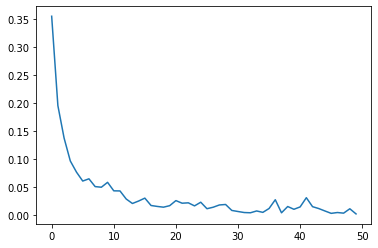

In [62]:
hist = [hist[i].to("cpu").detach().numpy() for i in range(len(hist))]
plt.plot(hist)

In [65]:
out = entre_sortie_reseau(DNN_, X_test)
y_hat = out[-1]
y_hat = y_hat.to('cpu').detach().numpy()
loss  = -np.sum(Y_test*np.log(y_hat+1e-9))/y_hat.shape[0]
y_hat = (y_hat > 0.5)*1
accuracy = accuracy_score(Y_test, y_hat)
print(f'We have an accuracy of {np.round(accuracy*100,3)}% \n and a entropy loss of {np.round(loss,3)}')

We have an accuracy of 96.05% 
 and a entropy loss of 0.242
